In [57]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver  
import pandas as pd
import time
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score


from sklearn import metrics

%matplotlib inline

# Modeling 

In [58]:
df = pd.read_csv("Data\data.csv")

In [59]:
df.head()

,Unnamed: 0,Name,Score,Category,Price_Range
0,0,1. شاهي ابو وليد,9.5,Café,$
1,1,2. Aseeb Najdi Restaurant,9.5,Restaurant,$
2,2,3. دوّار السّعادة,9.4,Breakfast,$
3,3,4. McDonald's,9.4,Fast Food,$$
4,4,5. SHiRO,9.3,Japanese,$$$


In [60]:
df.shape

(2300, 5)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2300 non-null   int64  
 1   Name         2300 non-null   object 
 2   Score        2300 non-null   float64
 3   Category     2300 non-null   object 
 4   Price_Range  2300 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 90.0+ KB


In [63]:
df.drop_duplicates()

,Unnamed: 0,Name,Score,Category,Price_Range
0,0,1. شاهي ابو وليد,9.5,Café,$
1,1,2. Aseeb Najdi Restaurant,9.5,Restaurant,$
2,2,3. دوّار السّعادة,9.4,Breakfast,$
3,3,4. McDonald's,9.4,Fast Food,$$
4,4,5. SHiRO,9.3,Japanese,$$$
...,...,...,...,...,...
2295,2295,24. Armin,9.2,Eastern European,$$
2296,2296,25. AlKadesiya Bakery,9.2,Bakery,$
2297,2297,26. Armin,9.2,Mediterranean,$
2298,2298,27. BLANCA,9.2,Pizza,$


In [64]:
#Display number missing values per column
df.isna().sum()

Unnamed: 0     0
Name           0
Score          0
Category       0
Price_Range    0
dtype: int64

In [65]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Features Engenering

In [66]:
# Convert 'value_category' to numeric values
label_encoder = LabelEncoder()
df['Price_Range_encoded'] = label_encoder.fit_transform(df['Price_Range'])
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

In [67]:
df['Price_Range'].unique()

array(['$', '$$', '$$$', '$$$$'], dtype=object)

In [68]:
df['Category_encoded'].unique()

array([ 8, 25,  5, 12, 19,  1, 15,  7, 33,  4, 14, 26, 23, 27, 24, 17, 16,
        3,  9, 22, 29, 18, 11, 30, 32, 13, 34, 21, 31, 20,  6, 28,  0,  2,
       10])

In [69]:
df['Price_Range_encoded'].value_counts()

Price_Range_encoded
0    1780
1     330
3     100
2      90
Name: count, dtype: int64

In [243]:
df['Category'].value_counts()

Category
Café                               400
Bakery                             350
Breakfast                          180
Donuts                             150
Burgers                            130
Restaurant                         110
Sandwich Spot                      110
Pizza                              100
Middle Eastern                      80
Japanese                            60
Shawarma Restaurant                 60
Steakhouse                          60
Fast Food                           50
Italian                             50
Indian                              30
Salad                               30
Food Truck                          30
French                              30
Armenian                            30
Food Court                          30
Mediterranean                       20
Snacks                              20
Lebanese                            20
BBQ                                 20
Falafel                             20
Fried Chicken   

In [242]:
df['Category_encoded'].value_counts()

Category_encoded
8     400
4     350
5     180
9     150
7     130
25    110
27    110
23    100
22     80
19     60
29     60
31     60
12     50
18     50
17     30
26     30
14     30
15     30
1      30
13     30
21     20
30     20
20     20
3      20
11     20
16     20
24     20
33     20
32     10
34     10
6      10
28     10
0      10
2      10
10     10
Name: count, dtype: int64

In [70]:
df.head()

,Name,Score,Category,Price_Range,Price_Range_encoded,Category_encoded
0,1. شاهي ابو وليد,9.5,Café,$,0,8
1,2. Aseeb Najdi Restaurant,9.5,Restaurant,$,0,25
2,3. دوّار السّعادة,9.4,Breakfast,$,0,5
3,4. McDonald's,9.4,Fast Food,$$,1,12
4,5. SHiRO,9.3,Japanese,$$$,2,19


In [71]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['Price_Range_encoded'].sort_values(ascending=False))

Price_Range_encoded    1.000000
Category_encoded       0.253067
Score                 -0.050164
Name: Price_Range_encoded, dtype: float64


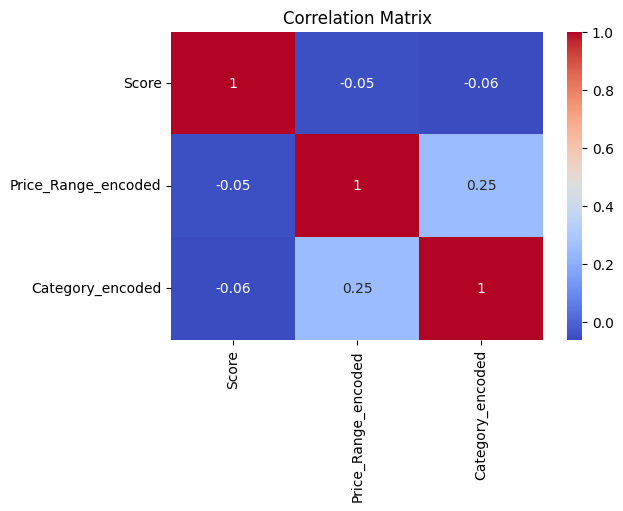

In [72]:
# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(round(correlation, 2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
df.columns

Index(['Name', 'Score', 'Category', 'Price_Range', 'Price_Range_encoded',
       'Category_encoded'],
      dtype='object')

In [77]:
selected_features = ['Score', 'Price_Range_encoded', 'Category_encoded']

In [78]:
df_selected = df[selected_features]


In [79]:
# Prepare data
X = df_selected


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
X

,Score,Price_Range_encoded,Category_encoded,kmeans,dbscan
0,9.5,0,8,1,0
1,9.5,0,25,1,0
2,9.4,0,5,1,0
3,9.4,1,12,1,-1
4,9.3,2,19,2,-1
...,...,...,...,...,...
2295,9.2,1,10,0,1
2296,9.2,0,4,0,0
2297,9.2,0,21,3,0
2298,9.2,0,23,3,0


In [80]:
X_scaled.shape


(2300, 3)

## Kmeans

In [86]:
wcss = []
for i in range(1, 20):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

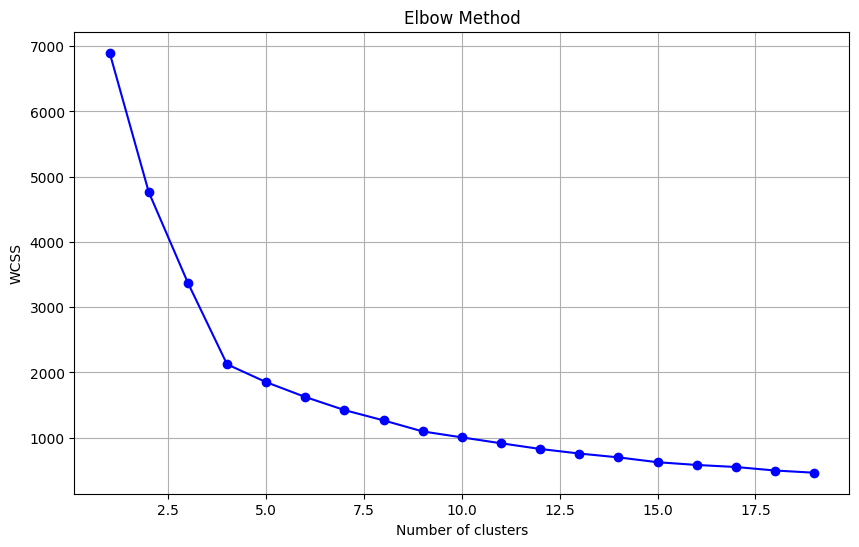

In [87]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [88]:
# Appling k-Means using the optimal number of clusters, which is 3 in this case.
optimal_clusters = 4
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=1)

In [89]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

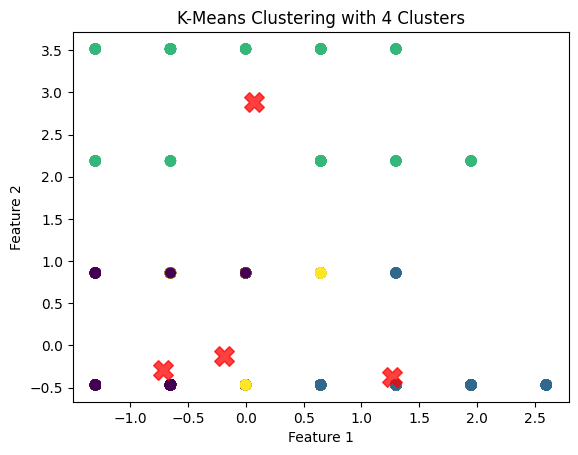

In [90]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [91]:
X['kmeans'] = y_pred
X['kmeans'].value_counts()

kmeans
0    840
3    700
1    570
2    190
Name: count, dtype: int64

In [92]:
X

,Score,Price_Range_encoded,Category_encoded,kmeans
0,9.5,0,8,1
1,9.5,0,25,1
2,9.4,0,5,1
3,9.4,1,12,1
4,9.3,2,19,2
...,...,...,...,...
2295,9.2,1,10,0
2296,9.2,0,4,0
2297,9.2,0,21,3
2298,9.2,0,23,3


<Axes: xlabel='Score', ylabel='Price_Range_encoded'>

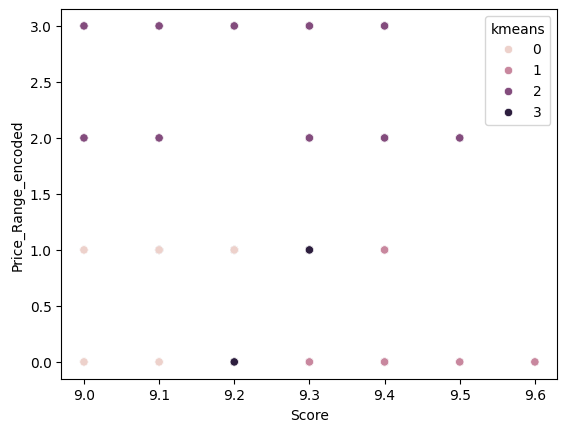

In [93]:
sns.scatterplot(data = X , x = 'Score', y = 'Price_Range_encoded', hue = 'kmeans')

<Axes: xlabel='Score', ylabel='Category_encoded'>

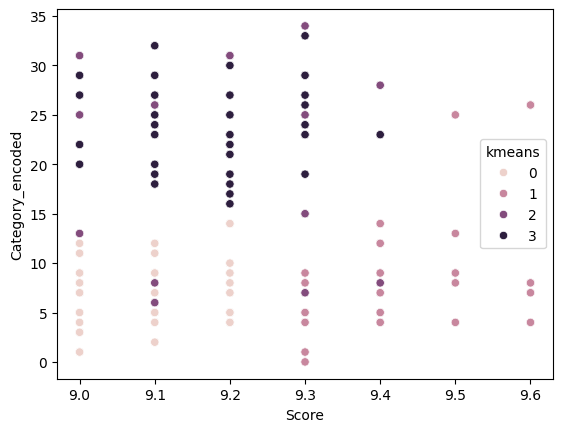

In [94]:
sns.scatterplot(data = X , x = 'Score', y = 'Category_encoded', hue = 'kmeans')

<Axes: xlabel='Category_encoded', ylabel='Price_Range_encoded'>

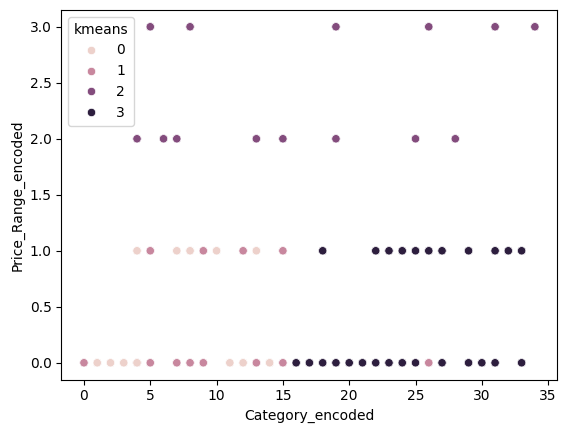

In [95]:
sns.scatterplot(data = X , x = 'Category_encoded', y = 'Price_Range_encoded', hue = 'kmeans')

## DBSCAN

In [187]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 45

In [188]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [189]:
#indices
distances[:,min_samples-1]

array([0.43627558, 0.68641112, 0.        , ..., 0.21813779, 0.10906889,
       0.32720668])

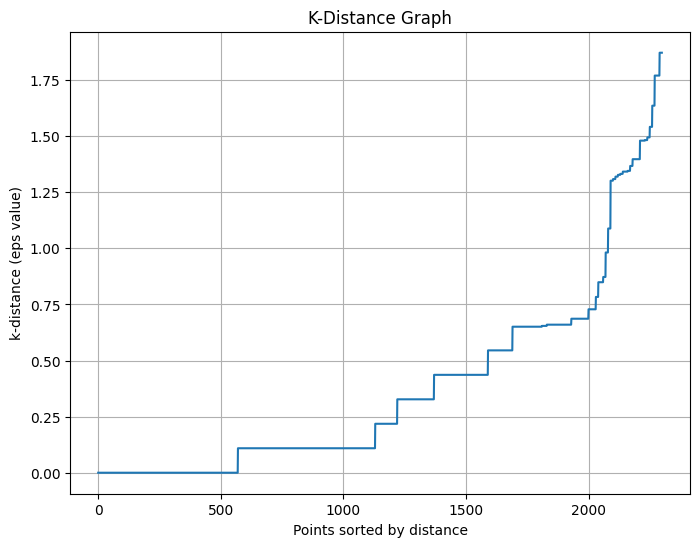

In [190]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

# Create a Plotly figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(
    y=k_dist_sorted,
    mode='lines',
    name='k-distance (eps value)'
))

# Update the layout
fig.update_layout(
    title='K-Distance Graph',
    xaxis_title='Points sorted by distance',
    yaxis_title='k-distance (eps value)',
    template='plotly_white',
    width=800,
    height=600
)

# Show the plot
fig.show()



In [223]:
# 4. Apply DBSCAN with chosen epslon and min_samples
# Typically, we choose eps at the "elbow" point in this plot, where the slope changes significantly, which is almost 1.6 in this problem.
chosen_eps = 0.7
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [224]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)

In [225]:
pd.Series(clusters).value_counts()


 0    1780
-1     240
 2     150
 1     130
Name: count, dtype: int64

In [226]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.41878199328807575

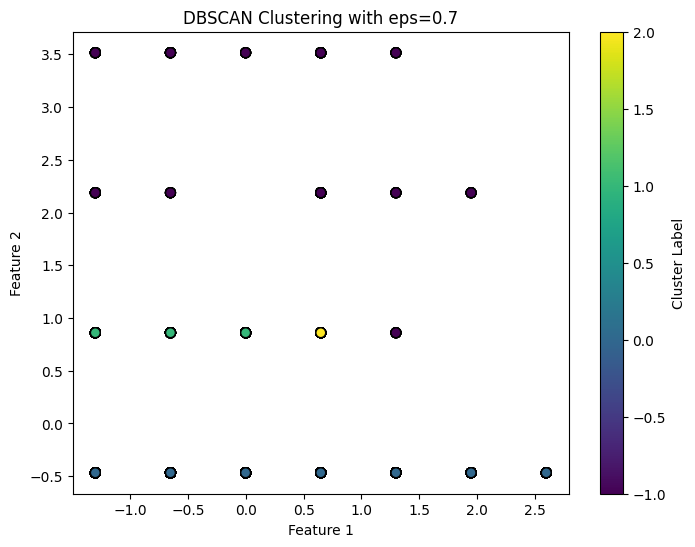

In [227]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [230]:
X

,Score,Price_Range_encoded,Category_encoded,kmeans,dbscan
0,9.5,0,8,1,0
1,9.5,0,25,1,0
2,9.4,0,5,1,0
3,9.4,1,12,1,-1
4,9.3,2,19,2,-1
...,...,...,...,...,...
2295,9.2,1,10,0,1
2296,9.2,0,4,0,0
2297,9.2,0,21,3,0
2298,9.2,0,23,3,0


In [229]:
X['dbscan'] = clusters
X['dbscan'].value_counts()


dbscan
 0    1780
-1     240
 2     150
 1     130
Name: count, dtype: int64

<Axes: xlabel='Score', ylabel='Price_Range_encoded'>

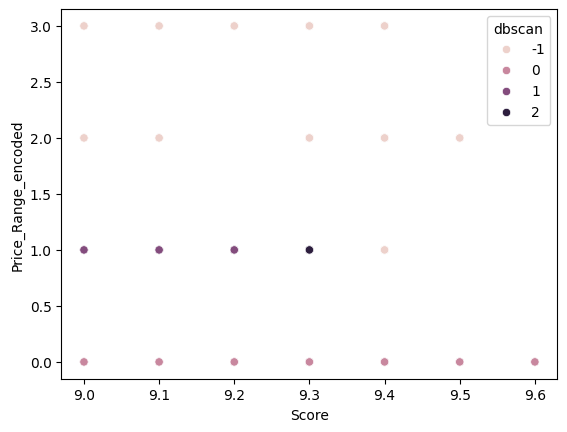

In [231]:
sns.scatterplot(data = X , x = 'Score', y = 'Price_Range_encoded', hue = 'dbscan')

<Axes: xlabel='Score', ylabel='Category_encoded'>

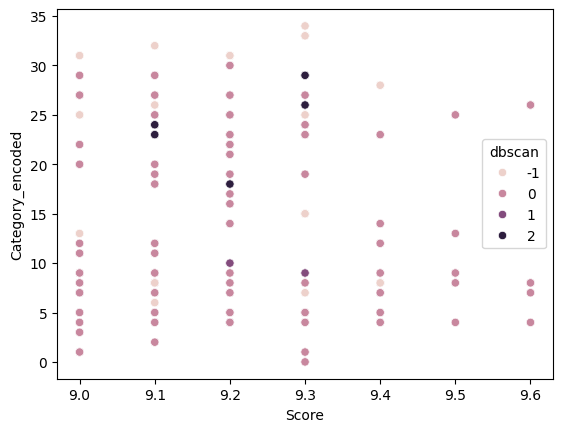

In [232]:
sns.scatterplot(data = X , x = 'Score', y = 'Category_encoded', hue = 'dbscan')

In [233]:
import joblib

joblib.dump(model, 'model-deployment/models/kmeans_model.pkl')
joblib.dump(dbscan, 'model-deployment/models/dbscan_model.pkl')
joblib.dump(scaler, 'model-deployment/models/scaler.pkl')


['model-deployment/models/scaler.pkl']

In [234]:
import joblib

# Save WCSS values
joblib.dump(wcss, 'model-deployment/models/wcss.pkl')

# Save k-distance sorted values

joblib.dump(k_dist_sorted, 'model-deployment/models/k_dist_sorted.pkl')


['model-deployment/models/k_dist_sorted.pkl']

In [235]:
df

,Name,Score,Category,Price_Range,Price_Range_encoded,Category_encoded
0,1. شاهي ابو وليد,9.5,Café,$,0,8
1,2. Aseeb Najdi Restaurant,9.5,Restaurant,$,0,25
2,3. دوّار السّعادة,9.4,Breakfast,$,0,5
3,4. McDonald's,9.4,Fast Food,$$,1,12
4,5. SHiRO,9.3,Japanese,$$$,2,19
...,...,...,...,...,...,...
2295,24. Armin,9.2,Eastern European,$$,1,10
2296,25. AlKadesiya Bakery,9.2,Bakery,$,0,4
2297,26. Armin,9.2,Mediterranean,$,0,21
2298,27. BLANCA,9.2,Pizza,$,0,23


In [236]:
df.to_csv("Data/Cleand_data.csv")